<a href="https://colab.research.google.com/github/ryandipp/python-project-aparilo-ecomms/blob/main/Aparilo_Ecoms_EDA_CustSegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x) # setting all float number to 2 place decimal like 2.33

1. importing dataframe#1 ORDERS

In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_orders.csv'
orders = pd.read_csv(url, sep=';')
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,2,1,Shipped,F,2022-09-23 16:02:00,NaN,2022-09-25 23:03:00,NaN,1
1,14,9,Shipped,F,2022-01-13 00:42:00,NaN,2022-01-15 09:26:00,NaN,1
2,23,14,Shipped,F,2022-07-06 16:45:00,NaN,2022-07-09 10:32:00,NaN,3
3,26,14,Shipped,F,2022-08-15 16:45:00,NaN,2022-08-18 03:32:00,NaN,3
4,28,16,Shipped,F,2022-05-26 16:39:00,NaN,2022-05-29 05:35:00,NaN,1


2. importing dataframe#2 ORDER ITEMS


In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_orderitems.csv'
oitems = pd.read_csv(url, sep=';')
oitems.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,134723,92627,73944,13606,363175,Shipped,2020-09-16 15:54:03,2020-09-15 14:00:00,NaN,NaN,2.50
1,92042,63301,50599,13606,248352,Complete,2023-01-16 10:52:40,2023-01-16 21:29:00,2023-01-21 10:49:00,NaN,2.50
2,75253,51752,41347,28951,202948,Shipped,2023-03-08 14:19:30,2023-03-06 19:05:00,NaN,NaN,3.00
3,17593,12085,9744,28951,47364,Complete,2021-10-15 00:16:31,2021-10-17 16:29:00,2021-10-20 06:45:00,NaN,3.00
4,134660,92577,73900,28951,363006,Complete,2023-04-16 17:02:17,2023-04-19 13:56:00,2023-04-20 17:53:00,NaN,3.00


3. importing dataframe#3 PRODUCTS


In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_products.csv'
products = pd.read_csv(url, sep = ';') 
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.65,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.41,Men,B23C5765E165D83AA924FA8F13C05F25,1.00
1,27445,24.72,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.99,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1.00
2,27457,15.90,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.60,Men,8F831227B0EB6C6D09A0555531365933,1.00
3,27466,17.85,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.00,Men,67317D6DCC4CB778AEB9219565F5456B,1.00
4,27481,29.41,Swim,TYR Alliance Team Splice Jammer,TYR,45.95,Men,213C888198806EF1A0E2BBF2F4855C6C,1.00


4. importing dataframe#4 USERS

In [ ]:
url = 'https://raw.githubusercontent.com/ryandipp/sql-project-aparilo-ecomms/main/data/apo_ecom_users.csv'
users = pd.read_csv(url, sep = ';')
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,14362,Mary,Harper,maryharper@gmail.com,59,F,Mie,3993 Rodriguez Squares,513-0836,Suzuka City,Japan,34.85,136.51,Search,2019-11-19 15:56:00
1,73189,Christopher,Richardson,christopherrichardson@gmail.com,24,M,Mie,40390 Andrea Plaza Suite 795,513-0836,Suzuka City,Japan,34.85,136.51,Email,2021-12-21 06:43:00
2,327,Courtney,Smith,courtneysmith@gmail.com,45,F,Acre,218 Jeanette Fields,69917-400,Rio Branco,Brasil,-9.95,-67.84,Search,2020-10-16 18:18:00
3,10449,Tiffany,Cox,tiffanycox@gmail.com,65,F,Acre,5342 Cheyenne Pass Apt. 492,69917-400,Rio Branco,Brasil,-9.95,-67.84,Email,2022-12-16 02:15:00
4,17456,Brandi,Gutierrez,brandigutierrez@gmail.com,68,F,Acre,84830 Angie Forge,69917-400,Rio Branco,Brasil,-9.95,-67.84,Search,2021-08-30 07:54:00


# Data Cleaning: fixing: data type, null, duplicates

copy all original DF (data frame)

In [ ]:
t_orders = orders.copy()
t_oitems = oitems.copy()
t_products = products.copy()
t_users = users.copy()
#copying done

##DF orders treatment

In [ ]:
t_orders['created_at'] = pd.to_datetime(t_orders['created_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['returned_at'] = pd.to_datetime(t_orders['returned_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['shipped_at'] = pd.to_datetime(t_orders['shipped_at'], format = '%Y-%m-%d %H:%M:%S')
t_orders['delivered_at'] = pd.to_datetime(t_orders['delivered_at'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
t_orders.sort_values(['order_id'], ascending= True, inplace= True)

##DF orderitems (oi) treatment

In [ ]:
t_oitems['created_at'] = pd.to_datetime(t_oitems['created_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['returned_at'] = pd.to_datetime(t_oitems['returned_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['shipped_at'] = pd.to_datetime(t_oitems['shipped_at'], format = '%Y-%m-%d %H:%M:%S')
t_oitems['delivered_at'] = pd.to_datetime(t_oitems['delivered_at'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
t_oitems.sort_values(['order_id'], ascending= True, inplace= True)

##DF users treatment

In [ ]:
t_users.sort_values(['id'], ascending= True, inplace= True)
t_users.info()
#found nulls in 'city' DS (dataseries)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5953 to 68652
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99037 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 12.2+ MB


converting account 'created_at' to date only

In [ ]:
t_users['created_at'] = pd.to_datetime(t_users['created_at'], format= '%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
t_users['created_at'] = pd.to_datetime(t_users['created_at'], format= '%Y-%m-%d')

In [ ]:
t_users.dropna(subset= ['city'], inplace = True)

##DF products treatment

In [ ]:
t_products.info()
#findings: products without SKU, department, distributor info (<1% of all data)
#          name & brand DS nulls -> can be manipulated by filling each other

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29074 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29095 non-null  object 
 7   sku                     29095 non-null  object 
 8   distribution_center_id  29095 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.0+ MB


In [ ]:
t_products.dropna(subset = ['department','sku','distribution_center_id'], inplace= True)

filling name & brand DS with eachother

In [ ]:
t_products['brand'].fillna(t_products['name'].str.split().str[:3].str.join(' '), inplace= True)

In [ ]:
t_products['name'].fillna(t_products['brand'], inplace= True)

we will fix all datatype of DS columns later

saving cleaned up & formatted DFs


In [ ]:
d_orders = t_orders.copy()
d_oitems = t_oitems.copy()
d_users = t_users.copy()
d_products = t_products.copy()

##Checking all DF contents

In [ ]:
def check_values(df):
  for c in df.columns:
    unique_qty = df[c].value_counts()
    print(f'Column: {c}')
    print(unique_qty, '\n')

In [ ]:
check_values(d_users) #fill function argument with all DF

Column: id
14362    1
36812    1
75431    1
72719    1
62299    1
        ..
28533    1
23345    1
19013    1
11662    1
70300    1
Name: id, Length: 99037, dtype: int64 

Column: first_name
Michael        2230
James          1534
David          1528
Jennifer       1453
Christopher    1387
               ... 
Neil              6
Darin             6
Kellie            6
Gene              6
Perry             5
Name: first_name, Length: 690, dtype: int64 

Column: last_name
Smith       2171
Johnson     1711
Williams    1407
Brown       1250
Jones       1211
            ... 
Finley        22
Arroyo        22
Ewing         21
Kaiser        21
Davies        18
Name: last_name, Length: 1000, dtype: int64 

Column: email
michaelsmith@gmail.com      52
davidsmith@gmail.com        49
johnsmith@gmail.com         38
jamessmith@gmail.com        34
michaelbrown@gmail.com      34
                            ..
bobbyrobinson@gmail.com      1
cherylhunter@gmail.com       1
dianarowe@gmail.com          1

# Merging DFs

orders + orderitems DF

In [ ]:
d_orderitem = pd.merge(d_oitems, d_orders, on = 'order_id', how = 'left' )

Dropping irrelevant columns

In [ ]:
d_orderitem.drop(columns= ['user_id_y','status_y','created_at_y','returned_at_y','shipped_at_y','delivered_at_y','num_of_item','id'], axis = 1, inplace= True)

In [ ]:
d_orderitem.sort_values(['product_id'], ascending= True, inplace= True)

##preparing products DF before merging

In [ ]:
clean_products = d_products.copy()

In [ ]:
clean_products.drop(columns= ['name','retail_price','sku'], axis= 1, inplace= True)

Merging d_orderitem + products

In [ ]:
d_op = pd.merge(d_orderitem, clean_products, left_on= 'product_id', right_on= 'id', how= 'left')

In [ ]:
d_op.drop(columns = 'id', axis=1, inplace= True)

In [ ]:
d_op.info()
# findings = there are orders for blank products (caused by cleanedup products)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181735 entries, 0 to 181734
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181735 non-null  int64         
 1   user_id_x               181735 non-null  int64         
 2   product_id              181735 non-null  int64         
 3   inventory_item_id       181735 non-null  int64         
 4   status_x                181735 non-null  object        
 5   created_at_x            181735 non-null  datetime64[ns]
 6   shipped_at_x            118309 non-null  datetime64[ns]
 7   delivered_at_x          64047 non-null   datetime64[ns]
 8   returned_at_x           18335 non-null   datetime64[ns]
 9   sale_price              181735 non-null  float64       
 10  gender                  181735 non-null  object        
 11  cost                    181584 non-null  float64       
 12  category                181584

##preparing users DF before merging

In [ ]:
clean_users = d_users.copy()

In [ ]:
clean_users.drop(columns=['first_name','last_name','email','gender','street_address','postal_code','latitude','longitude'],
                 axis=1, inplace=True)

##Final merging

In [ ]:
df_a = pd.merge(d_op, clean_users, left_on= 'user_id_x', right_on='id', how= 'left')

In [ ]:
df_a.drop(columns=['inventory_item_id','id'],
                 axis=1, inplace=True)

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181735 entries, 0 to 181734
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                181735 non-null  int64         
 1   user_id_x               181735 non-null  int64         
 2   product_id              181735 non-null  int64         
 3   status_x                181735 non-null  object        
 4   created_at_x            181735 non-null  datetime64[ns]
 5   shipped_at_x            118309 non-null  datetime64[ns]
 6   delivered_at_x          64047 non-null   datetime64[ns]
 7   returned_at_x           18335 non-null   datetime64[ns]
 8   sale_price              181735 non-null  float64       
 9   gender                  181735 non-null  object        
 10  cost                    181584 non-null  float64       
 11  category                181584 non-null  object        
 12  brand                   181584

##Dropping nulls from df_a DF (orders, orderitems, products, users)

In [ ]:
df_a.dropna(subset='age', inplace=True)

In [ ]:
df_a.dropna(subset='cost', inplace=True)

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179862 entries, 0 to 181734
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                179862 non-null  int64         
 1   user_id_x               179862 non-null  int64         
 2   product_id              179862 non-null  int64         
 3   status_x                179862 non-null  object        
 4   created_at_x            179862 non-null  datetime64[ns]
 5   shipped_at_x            117079 non-null  datetime64[ns]
 6   delivered_at_x          63381 non-null   datetime64[ns]
 7   returned_at_x           18143 non-null   datetime64[ns]
 8   sale_price              179862 non-null  float64       
 9   gender                  179862 non-null  object        
 10  cost                    179862 non-null  float64       
 11  category                179862 non-null  object        
 12  brand                   179862

In [ ]:
df_a.rename(columns={'created_at': 'account_made'}, inplace=True)
#we will rename all ugly named columns in saved csv via excel

In [ ]:
df_a['distribution_center_id'] = df_a['distribution_center_id'].astype(int)
df_a['age'] = df_a['age'].astype(int) 

Saving the first DF (all combined & cleaned)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/df_all.csv'
df_a.to_csv(file_path, index=False)

# Removing Outliers

In [ ]:
dfa= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aparilo/df_all.csv')

In [ ]:
dfa

,order_id,user_id,product_id,status,created,shipped,delivered,returned,sale_price,gender,...,category,brand,department,distribution_center_id,age,state,city,country,traffic_source,account_made
0,1266,1016,1,Shipped,3/13/2023 8:18,3/13/2023 12:17,NaN,NaN,49.00,F,...,Tops & Tees,Seven7,Women,1,57,Beijing,Anqing,China,Facebook,1/13/2022
1,28625,22898,1,Shipped,7/23/2020 0:00,7/20/2020 17:57,NaN,NaN,49.00,F,...,Tops & Tees,Seven7,Women,1,41,Guangdong,Changchun,China,Facebook,7/17/2020
2,43088,34437,1,Shipped,3/14/2023 23:56,3/17/2023 12:41,NaN,NaN,49.00,F,...,Tops & Tees,Seven7,Women,1,16,Utah,Ogden,United States,Search,12/30/2022
3,59106,47182,1,Processing,2/19/2020 13:21,NaN,NaN,NaN,49.00,F,...,Tops & Tees,Seven7,Women,1,23,Connecticut,Torrington,United States,Search,1/24/2019
4,30803,24599,1,Complete,9/26/2022 4:52,9/28/2022 12:17,10/2/2022 3:37,NaN,49.00,F,...,Tops & Tees,Seven7,Women,1,51,England,Chorley,United Kingdom,Email,7/26/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179857,108519,86641,29120,Processing,3/28/2023 0:08,NaN,NaN,NaN,78.00,M,...,Accessories,Boconi,Men,5,36,California,Fontana,United States,Search,10/30/2020
179858,60269,48129,29120,Processing,8/26/2022 7:29,NaN,NaN,NaN,78.00,M,...,Accessories,Boconi,Men,5,56,Guizhou,Guilin,China,Search,12/6/2021
179859,77527,61888,29120,Processing,3/28/2022 4:41,NaN,NaN,NaN,78.00,M,...,Accessories,Boconi,Men,5,51,Heilongjiang,Dongguan,China,Facebook,6/8/2021
179860,92533,73866,29120,Cancelled,10/10/2022 6:51,NaN,NaN,NaN,78.00,M,...,Accessories,Boconi,Men,5,59,Pennsylvania,Allentown,United States,Search,9/3/2022


##visualizing the outliers via Boxplot

<Axes: xlabel='sale_price'>

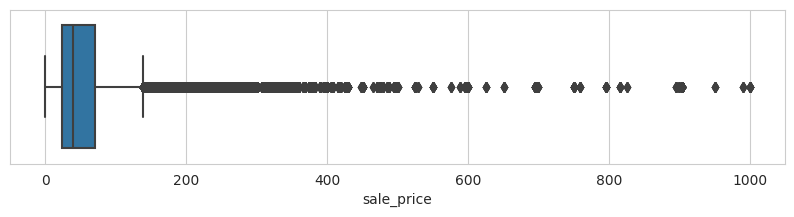

In [ ]:
plt.figure(figsize= (10,2))
sns.set_style('whitegrid')
sns.boxplot(x= dfa['sale_price'])

<Axes: xlabel='sale_price', ylabel='Count'>

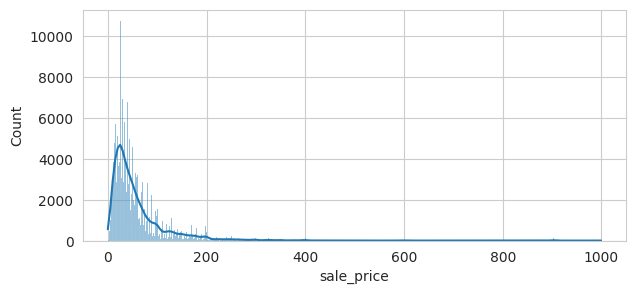

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(dfa['sale_price'], kde=True)

##Removing outliers via Z-score method

In [ ]:
z_s = stats.zscore(dfa['sale_price'])

In [ ]:
dfc=dfa[(z_s<3)]

<Axes: xlabel='sale_price'>

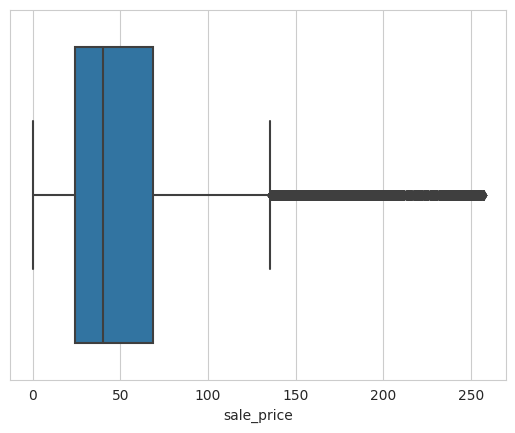

In [ ]:
sns.boxplot(x= dfc['sale_price'])

SKEWNESS:  1.7425516980424995


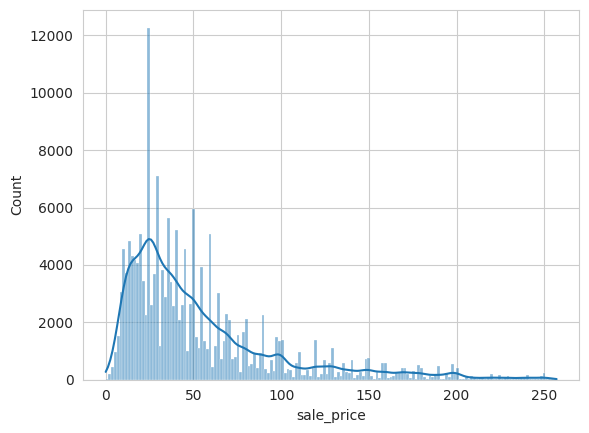

In [ ]:
sns.histplot(dfc['sale_price'], kde=True)
print('SKEWNESS: ',dfc['sale_price'].skew())

In [ ]:
dfclean['account_made'] = pd.to_datetime(dfclean['account_made'])

SAVE TO CSV

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/aparilo/dfclean.csv'
dfc.to_csv(file_path, index=False)

# EDA

In [9]:
dfclean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aparilo/dfclean.csv')

In [10]:
dfclean['created'] = pd.to_datetime(dfclean['created'], format= '%m/%d/%Y %H:%M')
dfclean['shipped'] = pd.to_datetime(dfclean['shipped'], format= '%m/%d/%Y %H:%M')
dfclean['delivered'] = pd.to_datetime(dfclean['delivered'], format= '%m/%d/%Y %H:%M')
dfclean['returned'] = pd.to_datetime(dfclean['returned'], format= '%m/%d/%Y %H:%M')

Filtering confirmed bought order (status: processing, shipped, complete)

In [ ]:
df_buy = dfclean[~dfclean['status'].isin(['Cancelled','Returned'])]
df_buy.drop(columns='returned', axis = 1, inplace=True)
df_buy.head()

##EDA 1: 6 Months vs 6 Months Order Frequency & Average Order Value

filtering the timeline



In [ ]:
#Last 6 months from Q1 2023
last_vi = datetime(2023,5,1) - timedelta(days=180)
#last 12-6 months
before_last_vi = last_vi - timedelta(days = 180)

In [ ]:
buy_past6 = df_buy[df_buy['created'] >= last_vi]

In [ ]:
buy_past12_6 = df_buy[(df_buy['created'] >= before_last_vi) & (df_buy['created'] < last_vi)]

order frequency per user & order value | past 6 months vs 6 months before





In [ ]:
#order frequency PAST 6 MONTHS
jumlah_order = buy_past6['order_id'].count()
distinct_user = buy_past6['user_id'].nunique()
of = jumlah_order / distinct_user

#order_value in average
mean_order_value = buy_past6['sale_price'].mean()
print(f'Past 6 months - Order Frequency = {of} / user')
print(f'Past 6 months - Order Value = {mean_order_value} USD')

Past 6 months - Order Frequency = 1.7886748394629306 / user
Past 6 months - Order Value = 53.80302939950404 USD


In [ ]:
#order frequency PAST 12-6 MONTHS
jumlah_order2 = buy_past12_6['order_id'].count()
distinct_user2 = buy_past12_6['user_id'].nunique()
of2 = jumlah_order2/distinct_user2

#average order value
mean_order_value2 = buy_past12_6['sale_price'].mean()
print(f'Past 6 months older - Order Frequency = {of2} / user')
print(f'Past 6 months older - Order Value = {mean_order_value2} USD')


Past 6 months older - Order Frequency = 1.6011944260119442 / user
Past 6 months older - Order Value = 54.09074074869449 USD


compiling the data to DF

In [ ]:
retention6monthsvs6months = pd.DataFrame({'Timeline Group':['Past_6_months','Past_12_6_months'],
                                          'Order Freq':[of,of2],
                                          'Avr Order Value':[mean_order_value, mean_order_value2]})

In [ ]:
retention6monthsvs6months

,Timeline Group,Order Freq,Avr Order Value
0,Past_6_months,1.79,53.80
1,Past_12_6_months,1.60,54.09


###EDA 1.a: important business metrics: order frequency, average order value, revenue. per year

In [ ]:
user_count = df_buy['user_id'].nunique()

buy_metrics = df_buy.groupby(df_buy['created'].dt.year).agg(
    order_freq = ('order_id', lambda x: x.count()/user_count),
    avg_order_value = ('sale_price','mean'),
    total_revenue = ('sale_price','sum')
).reset_index()
#ignore year 2023

In [ ]:
buy_metrics

,created,order_freq,avg_order_value,total_revenue
0,2019,0.06,53.22,205326.91
1,2020,0.20,53.96,689602.54
2,2021,0.41,53.61,1425340.78
3,2022,0.80,53.88,2809410.81
4,2023,0.57,53.91,2012025.05


##EDA 2: Revenue from each country

grouby & aggregate multiple columns and multiple condition:
Revenue/country year to year

In [ ]:
df_buy.groupby('country').agg(
    revenue2019= ('sale_price', lambda x: x[df_buy['created'].dt.year==2019].sum()),
    revenue2020= ('sale_price', lambda x: x[df_buy['created'].dt.year==2020].sum()),
    revenue2021= ('sale_price', lambda x: x[df_buy['created'].dt.year==2021].sum()),
    revenue2022= ('sale_price', lambda x: x[df_buy['created'].dt.year==2022].sum())
).sort_values('revenue2022', ascending=False).reset_index()


,country,revenue2019,revenue2020,revenue2021,revenue2022
0,China,70363.25,232737.46,487254.32,967150.71
1,United States,43625.42,160154.03,321728.38,631857.98
2,Brasil,29196.96,96887.29,196751.40,388466.62
3,South Korea,13686.18,41068.72,81679.74,148757.25
4,United Kingdom,9960.60,29688.82,64773.99,135385.89
5,France,11803.99,30223.67,64256.33,132641.26
6,Germany,7757.78,28918.72,61895.80,116301.95
7,Spain,7441.33,27734.04,55182.12,113100.55
8,Japan,4728.68,17198.83,40339.61,69031.68
9,Australia,3971.61,17023.20,29576.24,62650.64


###EDA 2.a: 2022 monthly revenue trend

In [ ]:
monthly2022_rev=df_buy.groupby(df_buy['created'].dt.month).agg(
    revenue=('sale_price', lambda x: x[df_buy['created'].dt.year==2022].sum())
).rename_axis('month of 2022').reset_index()

monthly2022_rev

,month of 2022,revenue
0,1,168212.72
1,2,160355.61
2,3,187487.39
3,4,198928.12
4,5,200946.40
5,6,228410.42
6,7,230426.96
7,8,248569.66
8,9,259450.74
9,10,291323.91


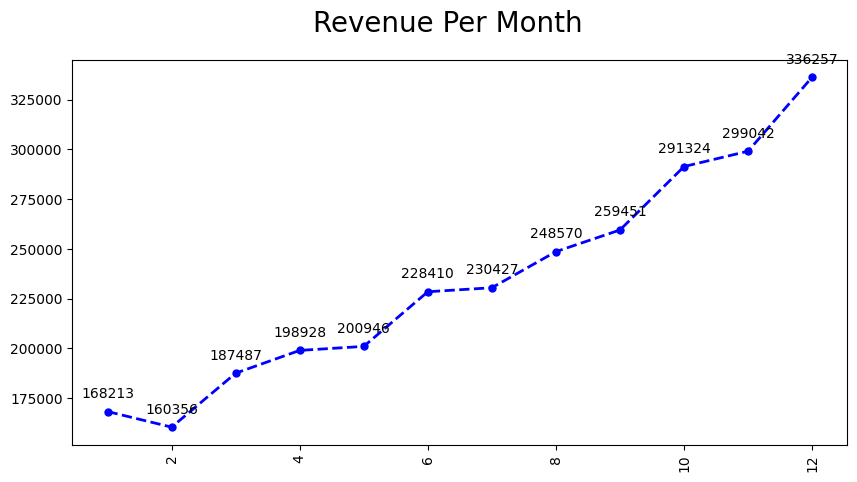

In [ ]:
fig1 = plt.figure(figsize = (10,5))
fig1.suptitle('Revenue Per Month', fontsize = 20)

x = monthly2022_rev['month of 2022']
y = monthly2022_rev['revenue']
plt.xticks(rotation=90)
plt.plot(x, y, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=5)
for x,y in zip(x,y):
  label = '{:.0f}'.format(y)

  plt.annotate(label,
               (x,y),
               textcoords='offset points',
               xytext =(0,10),
               ha = 'center',
               fontsize = 10)
plt.show()

##EDA 3: Processing time performance

filtering COMPLETE orders + PROCESSING

In [ ]:
delivered = df_buy[df_buy['status']=='Complete']
delivered.sort_values('created', ascending= True)

making new column: processing time, in hours

In [ ]:
delivered['process_time'] = (delivered['delivered'] - delivered['created']).dt.total_seconds()/3600/24

In [ ]:
delivered.groupby('country').agg(
    process_time = ('process_time', 'mean')    
    ).sort_values('process_time', ascending= False).reset_index()

,country,process_time
0,Australia,3.14
1,Belgium,3.10
2,Spain,3.09
3,France,3.09
4,United States,3.06
5,Germany,3.05
6,Brasil,3.05
7,China,3.03
8,Poland,3.01
9,South Korea,2.99


for fun: is there a correlation between process_time and order_count? maybe we can boost australia

In [ ]:
delivered[delivered['country'] == 'Australia'].head()

In [ ]:
#drill down to australia
delivered.groupby('state').agg(
    process_time = ('process_time', lambda x: x[delivered['country'] == 'Australia'].mean())
).sort_values('process_time', ascending= False).reset_index().head(8)

,state,process_time
0,Northern Territory,4.33
1,Australian Capital Territory,3.90
2,Tasmania,3.51
3,New South Wales,3.32
4,Western Australia,3.32
5,Queensland,3.11
6,South Australia,2.97
7,Victoria,2.86


### EDA 3.a: Order status to date in %

In [ ]:
total = len(dfclean)
dfclean.groupby('status').agg(
    n_status_percent = ('status', lambda x: x.count()/total)).sort_values('n_status_percent', ascending=False).reset_index()

,status,n_status_percent
0,Shipped,0.30
1,Complete,0.25
2,Processing,0.20
3,Cancelled,0.15
4,Returned,0.10


##EDA 4: Busiest day of week

In [ ]:
df_buy.groupby(df_buy['created'].dt.dayofweek)['sale_price'].sum().rename_axis('dayofweek').reset_index(name='revenue').sort_values('revenue', ascending=False)

,dayofweek,revenue
5,5,1034268.46
0,0,1031163.83
4,4,1030305.26
3,3,1018245.25
6,6,1016370.72
1,1,1009657.17
2,2,1001695.40


##EDA 5: Top selling products categories 

In [ ]:
top_categories = df_buy.groupby(['gender','category']).agg(
    order_freq = ('order_id','count'),
    revenue = ('sale_price','sum')
).reset_index().sort_values(['gender','revenue'], ascending=False)

top_categories

,gender,category,order_freq,revenue
25,M,Jeans,5612,527762.02
26,M,Outerwear & Coats,3782,416048.19
32,M,Sweaters,4964,363595.63
31,M,Suits & Sport Coats,3408,349606.25
27,M,Pants,5217,307084.30
24,M,Fashion Hoodies & Sweatshirts,4972,283603.23
34,M,Tops & Tees,5494,231277.38
33,M,Swim,4548,228591.66
28,M,Shorts,4828,226929.62
29,M,Sleep & Lounge,4738,220854.26


###EDA 5.a: Top 15 brands

In [ ]:
top_brands = df_buy.groupby('brand').agg(
    order_freq = ('order_id','count'),
    revenue = ('sale_price','sum')
).reset_index().sort_values(['order_freq'], ascending=False)

top_brands.head(15)

,brand,order_freq,revenue
96,Allegra K,4585,65766.03
445,Calvin Klein,2315,142114.87
462,Carhartt,1880,124694.43
1075,Hanes,1515,29896.16
2572,Volcom,1357,78087.85
1933,Quiksilver,1330,73992.03
1717,Nautica,1280,51802.58
2431,Tommy Hilfiger,1194,80490.42
1146,Hurley,1166,60478.06
1453,Levi's,1127,58146.28


###EDA 5.b: gender distribution

In [ ]:
df_buy['department'].value_counts().reset_index()

,index,department
0,Women,66652
1,Men,66039


##EDA 6: Users analysis 

In [12]:
dfclean['account_made'] = pd.to_datetime(dfclean['account_made'])

#### variables

In [13]:
cleanusers = dfclean[['user_id','order_id','gender','age','state','city','country','traffic_source','account_made','sale_price']].sort_values('user_id', ascending=True)

In [14]:
cleanusersuniq = cleanusers.copy()
#cleanusersuniq (analysis age group, country)
#cleanusers (analysis valuable)

In [15]:
cleanusersuniq.drop_duplicates(subset='user_id', keep='first', inplace=True)

###EDA 6.a: 6 vs 6 new accounts made




In [ ]:
acc_made_past_vi = cleanusersuniq[cleanusersuniq['account_made']>= last_vi].sort_values('user_id', ascending=True)

In [ ]:
acc_made_before_past_vi = cleanusersuniq[(cleanusersuniq['account_made']>= before_last_vi) & (cleanusersuniq['account_made']< last_vi)].sort_values('user_id', ascending=True)

In [ ]:
n_6 = len(acc_made_past_vi)
n_12_6 = len(acc_made_before_past_vi) 
print(f'Accounts made in past 6 months: {n_6}')
print(f'Accounts made in past 12-6 months: {n_12_6}')

Accounts made in past 6 months: 10450
Accounts made in past 12-6 months: 8684


In [ ]:
account_made = pd.DataFrame({
    'Timeline Group':['Past 6 months','Past 12-6 months'],
    'Made':[n_6, n_12_6]})
account_made

,Timeline Group,Made
0,Past 6 months,10450
1,Past 12-6 months,8684


###EDA 6.b: Age group

Making new series and lambda way

In [16]:
cleanusersuniq['age_group'] = cleanusersuniq['age'].apply(lambda x: '15-25' if (x >=15) and (x < 25)
                                                          else '25-40' if (x >=25) and (x < 40)
                                                          else '40-60' if (x >=40) and (x < 60)
                                                          else '60-80' if (x >=60) and (x <= 80)
                                                          else 0
                                                          )

In [17]:
agegrouped=cleanusersuniq.groupby('traffic_source').agg(
    _15_25=('age_group', lambda x: (x == '15-25').sum()),
    _25_40=('age_group', lambda x: (x == '25-40').sum()),
    _40_60=('age_group', lambda x: (x == '40-60').sum()),
    _60_80=('age_group', lambda x: (x == '60-80').sum())
).reset_index()
agegrouped



,traffic_source,_15_25,_25_40,_40_60,_60_80
0,Display,547,800,1109,567
1,Email,661,977,1322,761
2,Facebook,781,1245,1620,790
3,Organic,1962,3117,4007,2168
4,Search,9372,13846,18601,10358


###EDA 6.c: Top 10 valuable users

In [ ]:
top10valueusers= cleanusers.groupby('user_id').agg(
    USD_spent = ('sale_price','sum')
).reset_index().sort_values('USD_spent', ascending=False).head(10)

,user_id,USD_spent
62282,79203,1035.14
41479,52701,992.46
64474,81990,986.36
50709,64443,973.43
13405,17065,955.19
67816,86243,946.17
17326,22038,928.26
16204,20605,920.18
53953,68559,911.77
4349,5536,904.19


In [ ]:
pd.merge(top10valueusers, d_users, left_on = 'user_id', right_on='id', how='left)

# SEGMENT PREPARATION DF: normally segmenting users only done to confirmed value spent by users

##Making RFM DF (recency, frequency (order), monetary value)

In [ ]:
rfm = df_buy.groupby('user_id').agg(
    order_count=('order_id','count'),
    total_spend=('sale_price','sum'),
    recency=('created', lambda x: (datetime(2023,5,1)-x.max()).days)).sort_values('recency', ascending= True)

In [ ]:
rfm.sort_index(ascending=True)

,order_count,total_spend,recency
user_id,,,
1,2,67.50,99
4,1,19.90,513
6,4,233.44,116
7,3,80.24,85
8,1,23.43,213
...,...,...,...
99994,1,59.00,404
99996,1,19.99,247
99998,1,19.90,1064


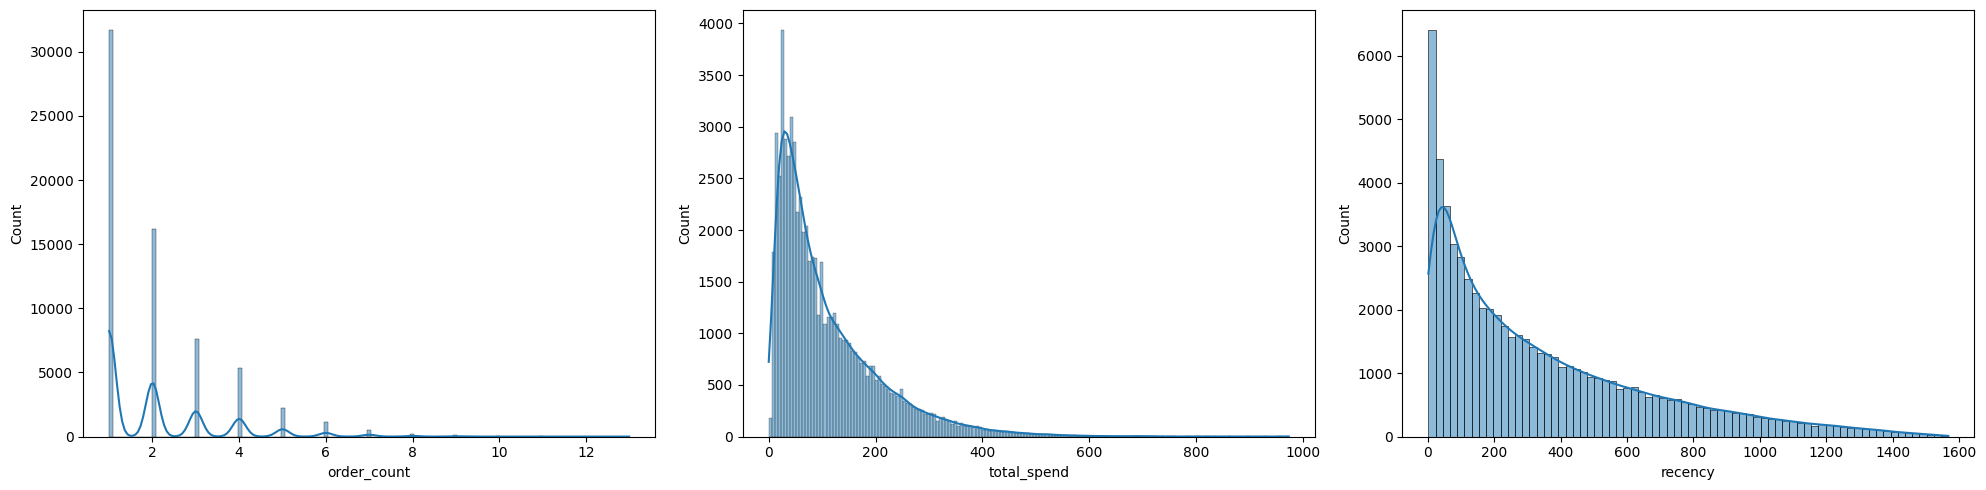

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(rfm['order_count'], kde=True, ax=ax[0])
sns.histplot(rfm['total_spend'], kde=True,ax=ax[1])
sns.histplot(rfm['recency'], kde=True,ax=ax[2])
plt.tight_layout()

##Testing all normal distribution transforming methods:
1. log
2. squareroot
3. boxcox
4. cube root (x)^1/3

followed by skewness analysis of each method on each variable/column

In [ ]:
def analyze_skewness(x):
    for c in x.columns:
      fig, ax = plt.subplots(1, 5, figsize=(20,5))
      sns.histplot(x[c], kde=True, ax=ax[0])
      sns.distplot(np.log(x[c]),ax=ax[1])
      sns.distplot(np.sqrt(x[c]),ax=ax[2])
      sns.distplot(stats.boxcox(x[c])[0],ax=ax[3])
      sns.distplot(np.cbrt(x[c]),ax=ax[4])
      plt.tight_layout()

      print(c,'\n','original: ', x[c].skew().round(2))
      print('log: ', np.log(x[c]).skew().round(2))
      print('squareroot: ', np.sqrt(x[c]).skew().round(2))
      print('boxcox: ', pd.Series(stats.boxcox(x[c])[0]).skew().round(2))
      print('cuberoot', np.cbrt(x[c]).skew().round(2), '\n')


order_count 
 original:  1.73
log:  0.64
squareroot:  1.09
boxcox:  0.25
cuberoot 0.92 

total_spend 
 original:  1.75
log:  -0.29
squareroot:  0.71
boxcox:  -0.02
cuberoot 0.39 

recency 
 original:  1.18
log:  -0.76
squareroot:  0.35
boxcox:  -0.11
cuberoot 0.03 



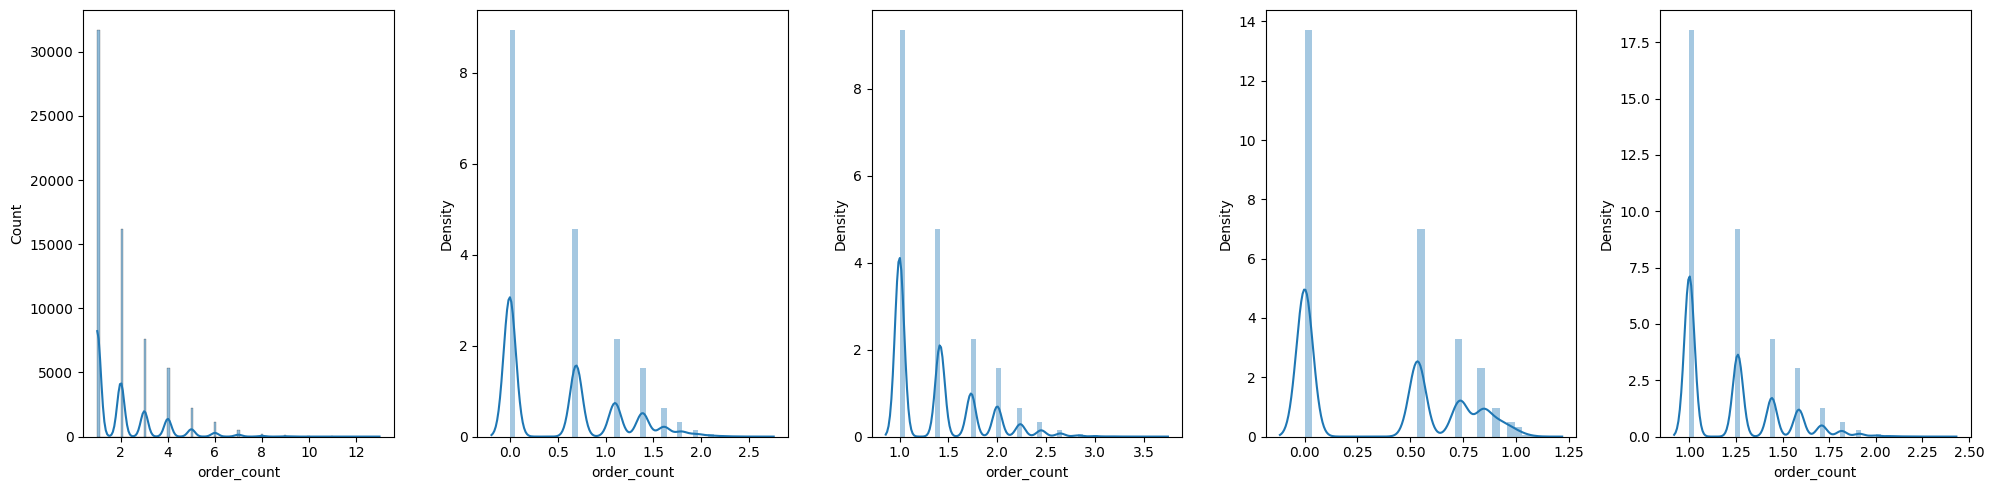

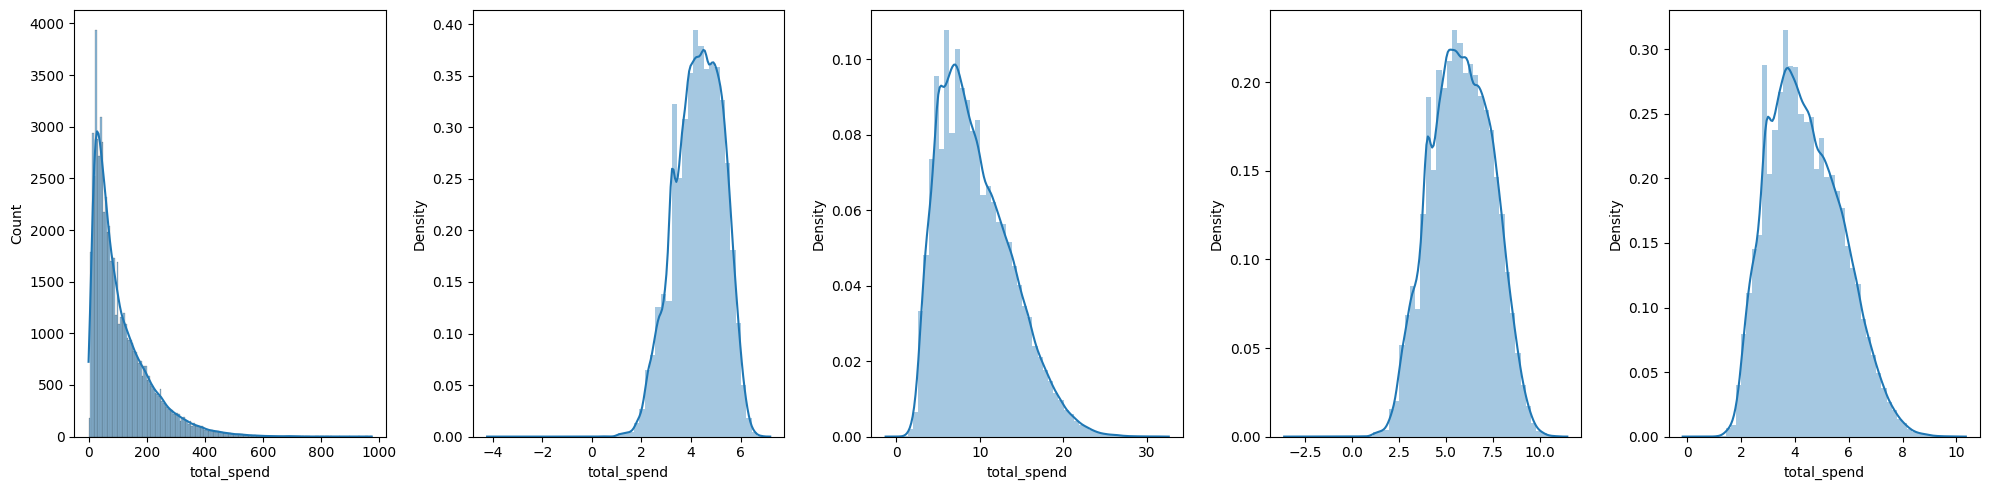

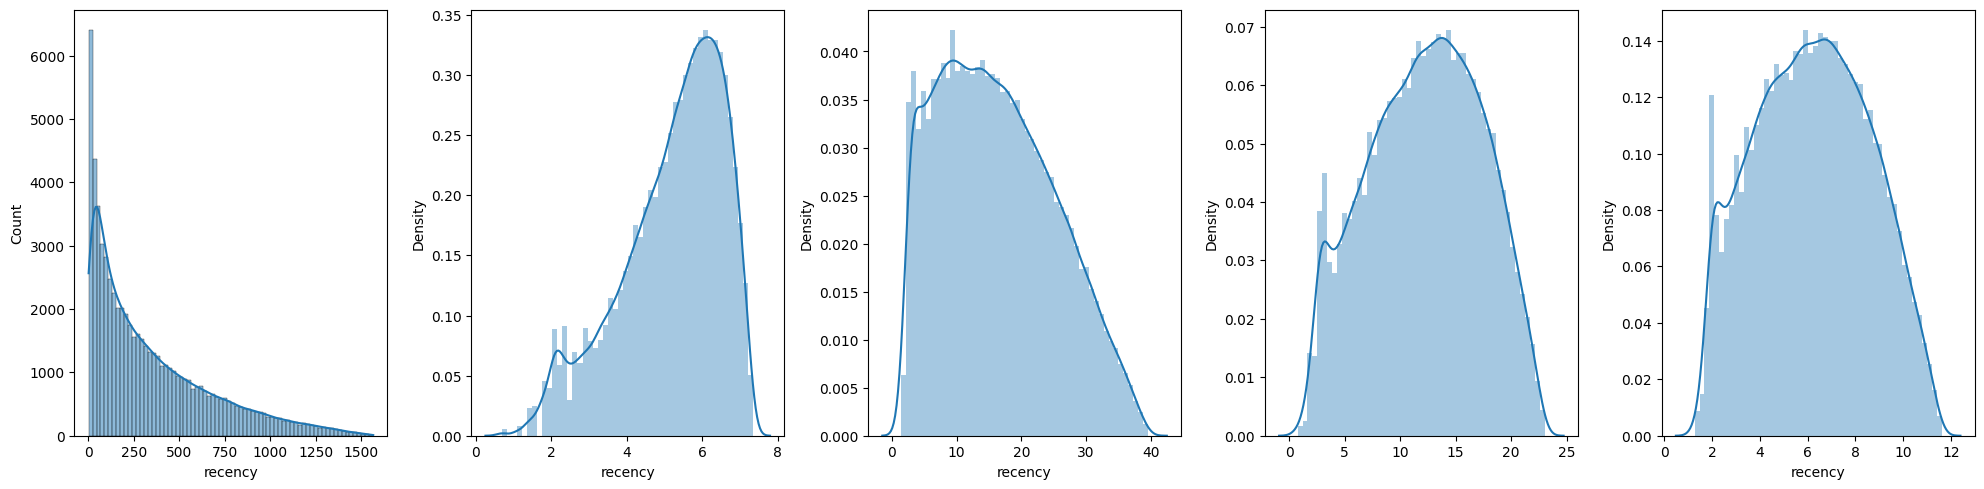

In [ ]:
analyze_skewness(rfm)

Column total_spend produces minus values in boxcox value. picking: boxcox for order frequency | cuberoot for recency, monetary (total_spend).

##Transforming RFM

In [ ]:
dist_rfm = rfm.copy()

In [ ]:
dist_rfm['order_count'] = stats.boxcox(dist_rfm['order_count'])[0]
dist_rfm['recency'] = np.cbrt(dist_rfm['recency'])
dist_rfm['total_spend'] = np.cbrt(dist_rfm['total_spend'])

In [ ]:
dist_rfm.describe()

,order_count,total_spend,recency
count,65014.00,65014.00,65014.00
mean,0.35,4.40,6.20
std,0.36,1.34,2.39
min,0.00,0.27,1.26
25%,0.00,3.36,4.31
50%,0.53,4.27,6.21
75%,0.74,5.35,8.05
max,1.10,9.91,11.62


##normalizing all variables into the same scale using StandardScaler sklearn

In [ ]:
normal_rfm = dist_rfm.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normal_rfm[['order_count','total_spend','recency']] = scaler.fit_transform(normal_rfm[['order_count','total_spend','recency']])

In [ ]:
normal_rfm.describe()

,order_count,total_spend,recency
count,65014.00,65014.00,65014.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.97,-3.07,-2.06
25%,-0.97,-0.77,-0.79
50%,0.51,-0.09,0.00
75%,1.08,0.71,0.77
max,2.10,4.10,2.26


Finding the most optimum K value (clusters)

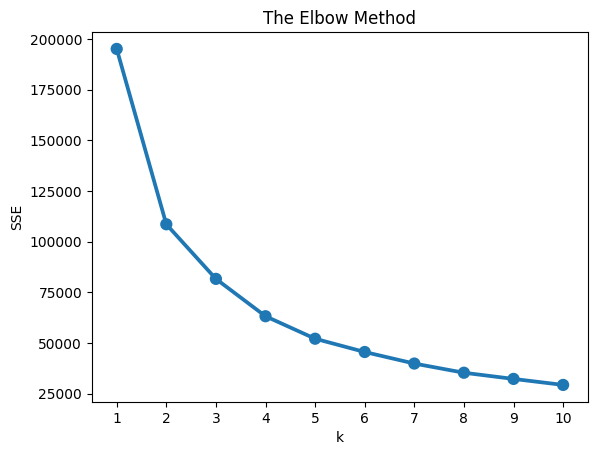

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normal_rfm)
    sse[k] = (kmeans.inertia_) # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

##Picking n-cluster (k) & modeling

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(normal_rfm)

In [ ]:
model.labels_

array([0, 0, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
normal_rfm['cluster'] = model.labels_


In [ ]:
normal_rfm = normal_rfm.reset_index()

In [ ]:
normal_rfm

,user_id,order_count,total_spend,recency,cluster
0,4204,1.38,0.40,-2.06,0
1,12165,1.70,1.89,-2.06,0
2,86815,0.51,0.10,-2.06,2
3,12169,0.51,0.46,-2.06,0
4,52106,1.38,2.23,-2.06,0
...,...,...,...,...,...
65009,87155,-0.97,-0.22,2.25,1
65010,22536,-0.97,-0.33,2.26,1
65011,13338,-0.97,-1.92,2.26,1
65012,21761,0.51,0.11,2.26,1


Summarying & plotting

In [ ]:
data_rfm=normal_rfm.groupby('cluster').agg(
    Recency = ('recency','mean'),
    Frequency = ('order_count','mean'),
    Monetary_Spending = ('total_spend','mean'),
    n_Users = ('user_id','count')
)

In [ ]:
data_rfm.reset_index()

,cluster,Recency,Frequency,Monetary_Spending,n_Users
0,0,-0.21,1.03,0.89,26139
1,1,0.96,-0.69,-0.57,20991
2,2,-0.82,-0.70,-0.63,17884


Conclusion:
*   cluster 0 = low Recency, highest Frequency, highest Spending: valuable users
*   cluster 1 = highest Recency, low Frequency, low Spending: churned users
*   cluster 2 = lowest Recency, lowest Frequency, lowest Spending: new users





##References
Daqing C., Sai L.S, and Kun G., Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining (2012), Journal of Database Marketing and Customer Strategy Management.<br>
K. Jarrod Millman and Michael Aivazis. Python for Scientists and Engineers(2011). Computing in Science & Engineering.<br>
https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45<br>
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/